<a href="https://colab.research.google.com/github/didierjc/didierjc-phd/blob/main/ANA%20675%20Week%203%20Practice%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Class labels for Fashion MNIST
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Normalize the images to the range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape images to add a color channel (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
cnn = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Conv2D: A 2D convolutional layer that applies 32 filters (kernels) to the input image.
    # filters=32: Number of filters, each detecting specific patterns in the image.
    # kernel_size=(3, 3): Each filter is a 3x3 matrix that slides over the input image to extract features.
    # activation='relu': ReLU activation function introduces non-linearity, keeping only positive values.
    # input_shape=(28, 28, 1): The input shape is specified as 28x28 pixels with 1 channel (grayscale).

    # First Max Pooling Layer
    layers.MaxPooling2D((2, 2)),
    # MaxPooling2D: A downsampling layer that reduces the spatial dimensions of the feature maps.
    # pool_size=(2, 2): Takes the maximum value from each 2x2 region, reducing the size by half (from 28x28 to 14x14).
    # This helps reduce computational complexity and captures dominant features.

    # Second Convolutional Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # Another Conv2D layer with 64 filters and a 3x3 kernel.
    # This layer builds on the features extracted by the first convolutional layer, learning more complex patterns.

    # Second Max Pooling Layer
    layers.MaxPooling2D((2, 2)),
    # Another MaxPooling2D layer, reducing the spatial dimensions further (from 14x14 to 7x7).

    # Flatten Layer
    layers.Flatten(),
    # Flatten: Converts the 2D feature maps (7x7x64) into a 1D vector (size 3136) to feed into the Dense layers.
    # This step bridges the convolutional layers and the fully connected layers.

    # First Dense (Fully Connected) Layer
    layers.Dense(128, activation='relu'),
    # Dense: A fully connected layer with 128 neurons.
    # Each neuron connects to all inputs from the

# Compile the model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 25ms/step - accuracy: 0.7739 - loss: 0.6207 - val_accuracy: 0.8745 - val_loss: 0.3440
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 20ms/step - accuracy: 0.8877 - loss: 0.3072 - val_accuracy: 0.8929 - val_loss: 0.2962
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9054 - loss: 0.2577 - val_accuracy: 0.8980 - val_loss: 0.2789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9180 - loss: 0.2184 - val_accuracy: 0.8982 - val_loss: 0.2812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9280 - loss: 0.1935 - val_accuracy: 0.9097 - val_loss: 0.2577
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9365 - loss: 0.1686 - val_accuracy: 0.8994 - val_loss: 0.2753
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9448 - loss: 0.1483 - val_accuracy: 0.9103 - val_loss: 0.2599
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9528 -

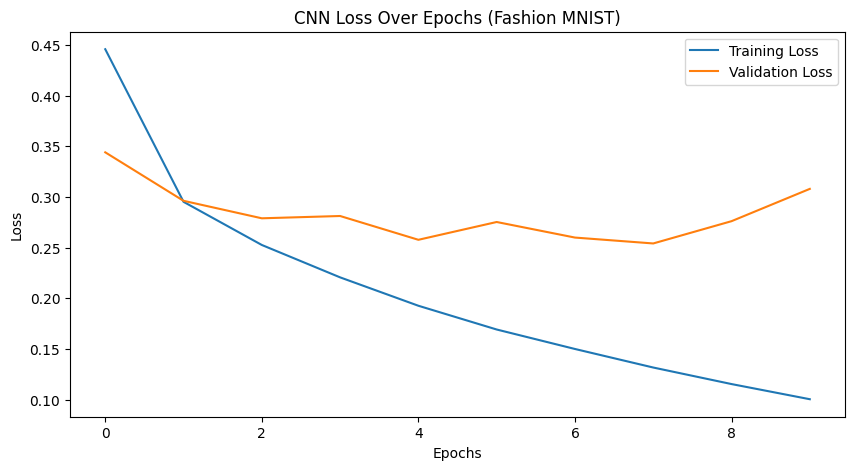

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss Over Epochs (Fashion MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




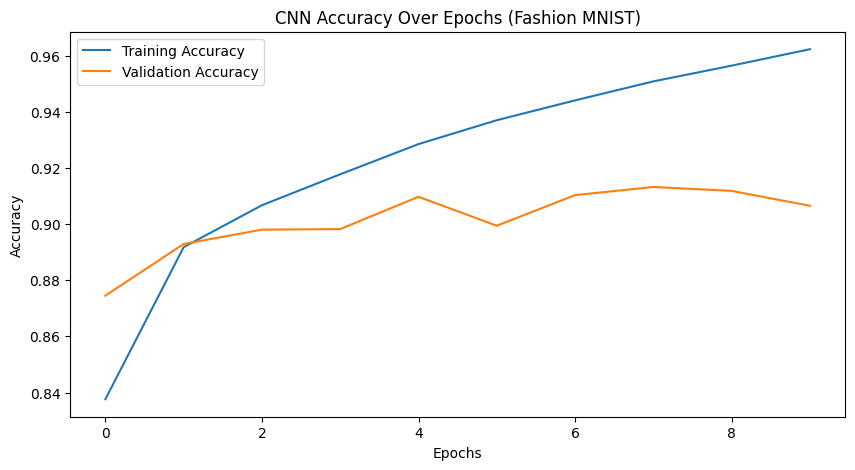

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy Over Epochs (Fashion MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report for CNN (Fashion MNIST):")
print(classification_report(y_test, y_pred_classes, target_names=classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report for CNN (Fashion MNIST):
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.76      0.94      0.84      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.91      0.76      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.80      0.69      0.74      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.94      0.99      0.97      1000
  Ankle Boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



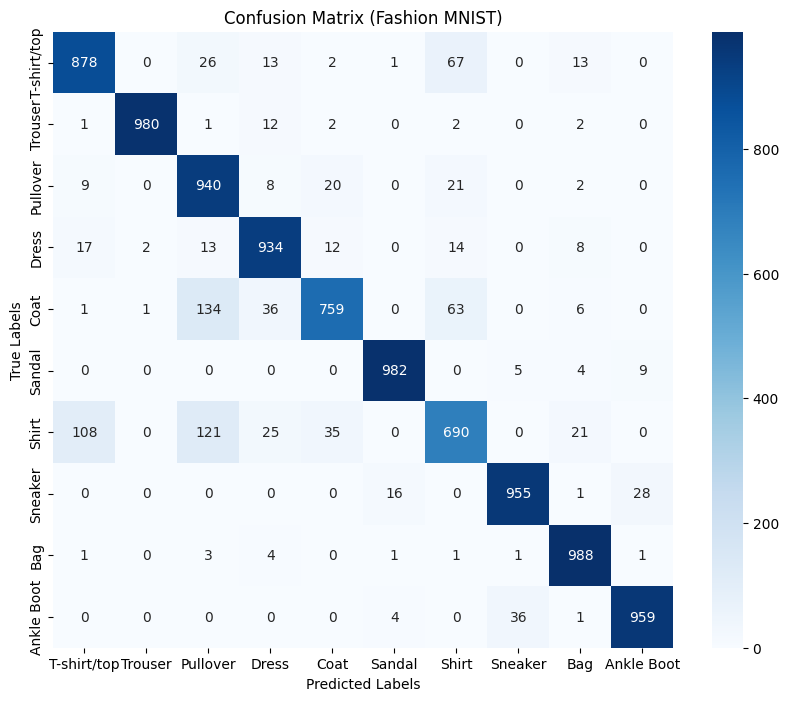

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (Fashion MNIST)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


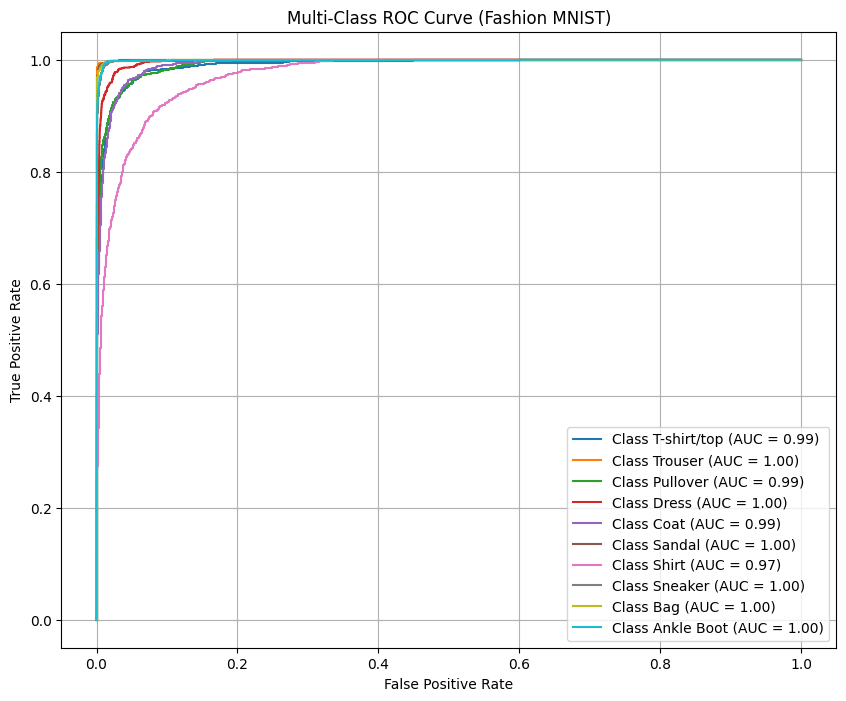

In [ ]:
# Binarize labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=range(10))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.title('Multi-Class ROC Curve (Fashion MNIST)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


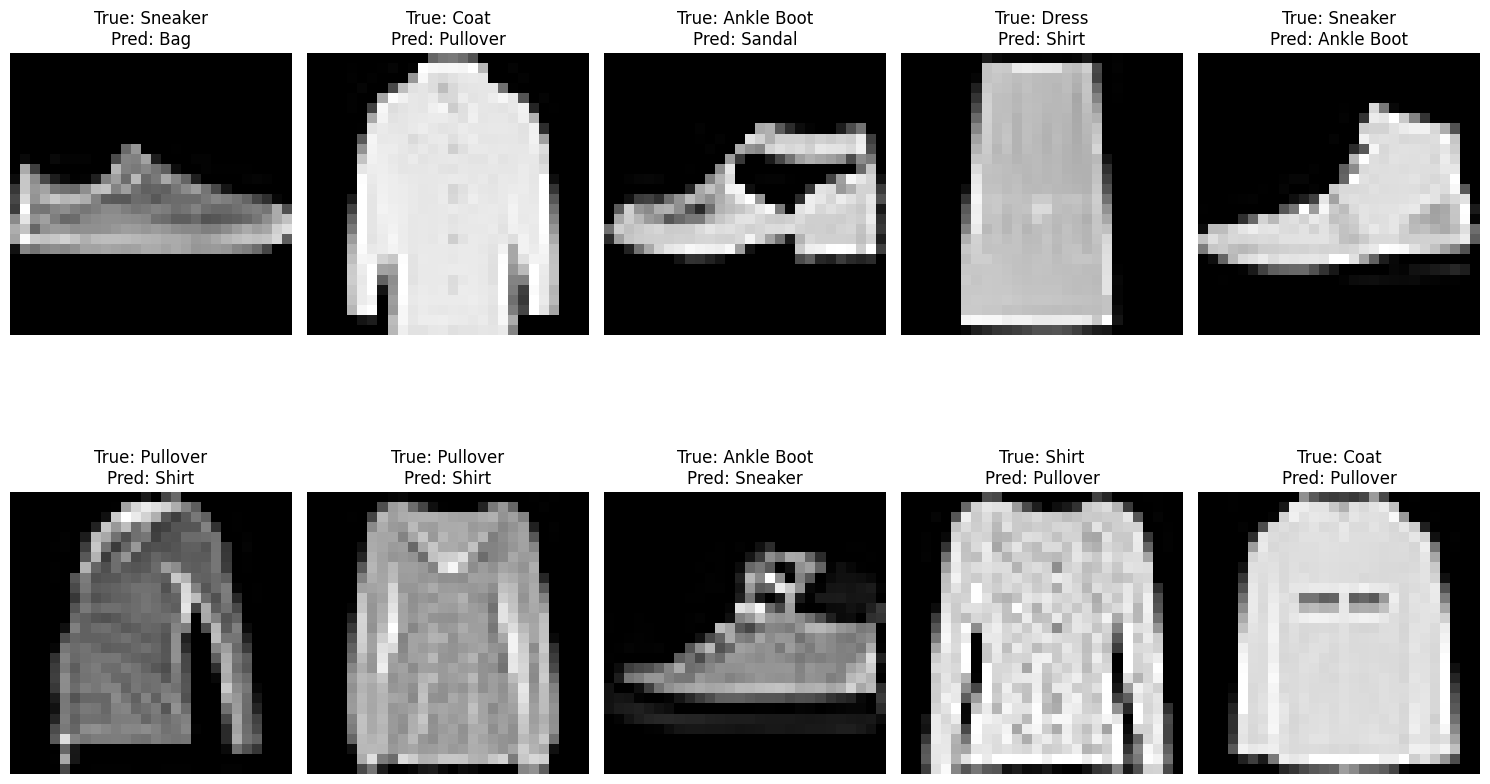

In [ ]:
# Identify misclassified indices
incorrect_indices = np.where(y_test != y_pred_classes)[0]

# Visualize the first 10 misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    img = (X_test[idx] * 255).squeeze().astype('uint8')  # Convert back to grayscale
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {classes[y_test[idx]]}\nPred: {classes[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
